<a href="https://colab.research.google.com/github/viniciussogo/EBAC/blob/main/Mod_18_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada.
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [7]:
def analise_bivariada(df, resposta, explicativa):

    tab = pd.crosstab(df[explicativa], df[resposta], normalize='index') * 100
    tab.columns = [f'Perc_{col}' for col in tab.columns]
    tab['Total'] = df[explicativa].value_counts()
    return tab

# Aplicação da função para as variáveis qualitativas
variaveis_qualitativas = ['sex', 'cp', 'thal']
resultados = {}

for var in variaveis_qualitativas:
    resultados[var] = analise_bivariada(df, 'flag_doente', var)

# Exibir os resultados
for var, tabela in resultados.items():
    print(f"\nAnálise bivariada para {var}:\n")
    print(tabela)



Análise bivariada para sex:

        Perc_0     Perc_1  Total
sex                             
0.0  74.226804  25.773196     97
1.0  44.660194  55.339806    206

Análise bivariada para cp:

        Perc_0     Perc_1  Total
cp                              
1.0  69.565217  30.434783     23
2.0  82.000000  18.000000     50
3.0  79.069767  20.930233     86
4.0  27.083333  72.916667    144

Análise bivariada para thal:

         Perc_0     Perc_1  Total
thal                             
3.0   77.710843  22.289157    166
6.0   33.333333  66.666667     18
7.0   23.931624  76.068376    117
?     50.000000  50.000000      2


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [11]:
def analise_bivariada(df, resposta, explicativa):

    tab = pd.crosstab(df[explicativa], df[resposta], normalize='index') * 100
    tab.columns = [f'Perc_{col}' for col in tab.columns]
    tab['Total'] = df[explicativa].value_counts()
    return tab

def analise_bivariada_continua(df, resposta, explicativa, num_categorias=5):

    df["cat_" + explicativa] = pd.qcut(df[explicativa], num_categorias, duplicates='drop')
    return analise_bivariada(df, resposta, "cat_" + explicativa)

# Aplicação da função para as variáveis qualitativas
variaveis_qualitativas = ['sex', 'cp', 'thal']
resultados = {}

for var in variaveis_qualitativas:
    resultados[var] = analise_bivariada(df, 'flag_doente', var)

# Exibir os resultados
for var, tabela in resultados.items():
    print(f"\nAnálise bivariada para {var}:\n")
    print(tabela)



Análise bivariada para sex:

        Perc_0     Perc_1  Total
sex                             
0.0  74.226804  25.773196     97
1.0  44.660194  55.339806    206

Análise bivariada para cp:

        Perc_0     Perc_1  Total
cp                              
1.0  69.565217  30.434783     23
2.0  82.000000  18.000000     50
3.0  79.069767  20.930233     86
4.0  27.083333  72.916667    144

Análise bivariada para thal:

         Perc_0     Perc_1  Total
thal                             
3.0   77.710843  22.289157    166
6.0   33.333333  66.666667     18
7.0   23.931624  76.068376    117
?     50.000000  50.000000      2


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [12]:
# Construção do modelo de regressão logística
formula = "flag_doente ~ sex + cp + trestbps + age"
modelo = smf.logit(formula, data=df).fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                  0.2605
Time:                        19:57:20   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

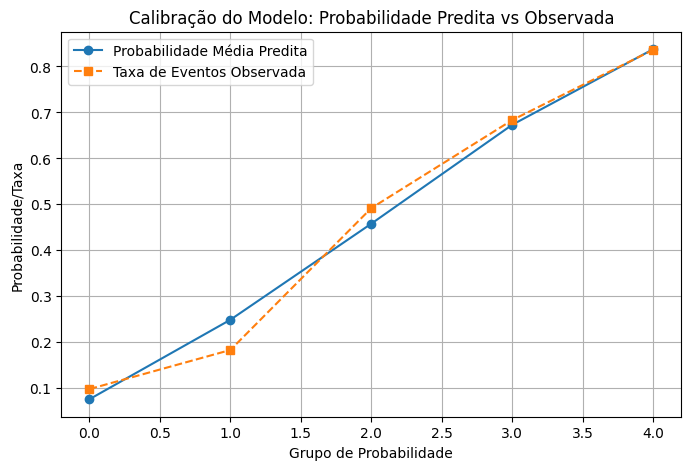

In [13]:
# Avaliação da calibragem do modelo
# Cálculo da probabilidade prevista
df['prob_predita'] = modelo.predict(df)

# Categorizar probabilidade prevista em G=5 grupos
df['grupo_prob'] = pd.qcut(df['prob_predita'], 5, labels=False)

# Cálculo da probabilidade média e taxa de eventos por grupo
calibragem = df.groupby('grupo_prob').agg(
    prob_media=('prob_predita', 'mean'),
    taxa_evento=('flag_doente', 'mean')
).reset_index()

# Comparação gráfica
plt.figure(figsize=(8, 5))
plt.plot(calibragem['grupo_prob'], calibragem['prob_media'], marker='o', linestyle='-', label='Probabilidade Média Predita')
plt.plot(calibragem['grupo_prob'], calibragem['taxa_evento'], marker='s', linestyle='--', label='Taxa de Eventos Observada')
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Probabilidade/Taxa')
plt.legend()
plt.title('Calibração do Modelo: Probabilidade Predita vs Observada')
plt.grid()
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [16]:
# Avaliação da discriminação do modelo
# Cálculo da acurácia
pred_class = (df['prob_predita'] >= 0.5).astype(int)
accuracy = accuracy_score(df['flag_doente'], pred_class)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Cálculo do GINI
auc = roc_auc_score(df['flag_doente'], df['prob_predita'])
gini = 2 * auc - 1
print(f"GINI: {gini:.4f}")

# Cálculo do KS
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['prob_predita'])
ks = max(tpr - fpr)
print(f"KS: {ks:.4f}")

Acurácia do modelo: 0.7789
GINI: 0.6622
KS: 0.5840


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).


Análise bivariada para sex:

        Perc_0     Perc_1  Total
sex                             
0.0  74.226804  25.773196     97
1.0  44.660194  55.339806    206

Análise bivariada para cp:

        Perc_0     Perc_1  Total
cp                              
1.0  69.565217  30.434783     23
2.0  82.000000  18.000000     50
3.0  79.069767  20.930233     86
4.0  27.083333  72.916667    144

Análise bivariada para thal:

         Perc_0     Perc_1  Total
thal                             
3.0   77.710843  22.289157    166
6.0   33.333333  66.666667     18
7.0   23.931624  76.068376    117
?     50.000000  50.000000      2
Optimization terminated successfully.
         Current function value: 0.443041
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE

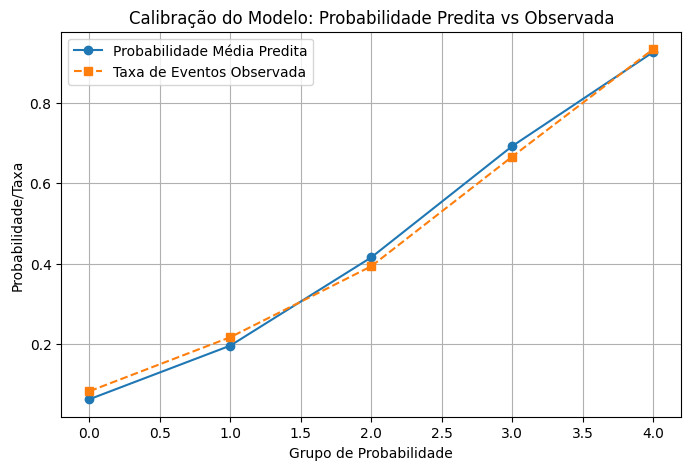

Acurácia do modelo: 0.7855
GINI: 0.7449
KS: 0.6006


In [17]:
def analise_bivariada(df, resposta, explicativa):

    tab = pd.crosstab(df[explicativa], df[resposta], normalize='index') * 100
    tab.columns = [f'Perc_{col}' for col in tab.columns]
    tab['Total'] = df[explicativa].value_counts()
    return tab

def analise_bivariada_continua(df, resposta, explicativa, num_categorias=5):

    df["cat_" + explicativa] = pd.qcut(df[explicativa], num_categorias, duplicates='drop')
    return analise_bivariada(df, resposta, "cat_" + explicativa)

# Aplicação da função para as variáveis qualitativas
variaveis_qualitativas = ['sex', 'cp', 'thal']
resultados = {}

for var in variaveis_qualitativas:
    resultados[var] = analise_bivariada(df, 'flag_doente', var)

# Exibir os resultados
for var, tabela in resultados.items():
    print(f"\nAnálise bivariada para {var}:\n")
    print(tabela)

# Construção do modelo de regressão logística otimizado
formula = "flag_doente ~ sex + cp + thalach + oldpeak + chol + age"
modelo = smf.logit(formula, data=df).fit()
print(modelo.summary())

# Avaliação da calibragem do modelo
# Cálculo da probabilidade prevista
df['prob_predita'] = modelo.predict(df)

# Categorizar probabilidade prevista em G=5 grupos
df['grupo_prob'] = pd.qcut(df['prob_predita'], 5, labels=False)

# Cálculo da probabilidade média e taxa de eventos por grupo
calibragem = df.groupby('grupo_prob').agg(
    prob_media=('prob_predita', 'mean'),
    taxa_evento=('flag_doente', 'mean')
).reset_index()

# Comparação gráfica
plt.figure(figsize=(8, 5))
plt.plot(calibragem['grupo_prob'], calibragem['prob_media'], marker='o', linestyle='-', label='Probabilidade Média Predita')
plt.plot(calibragem['grupo_prob'], calibragem['taxa_evento'], marker='s', linestyle='--', label='Taxa de Eventos Observada')
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Probabilidade/Taxa')
plt.legend()
plt.title('Calibração do Modelo: Probabilidade Predita vs Observada')
plt.grid()
plt.show()

# Avaliação da discriminação do modelo
# Cálculo da acurácia
pred_class = (df['prob_predita'] >= 0.5).astype(int)
accuracy = accuracy_score(df['flag_doente'], pred_class)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Cálculo do GINI
auc = roc_auc_score(df['flag_doente'], df['prob_predita'])
gini = 2 * auc - 1
print(f"GINI: {gini:.4f}")

# Cálculo do KS
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['prob_predita'])
ks = max(tpr - fpr)
print(f"KS: {ks:.4f}")


O modelo se mostrou mais efetivo removendo trestbps e adicionando thalach, oldpeak e chol, aumentando sua acurácia e pseudo-R squared.